<a href="https://colab.research.google.com/github/mdogruer905/IMDB-Binary-Classification-With-Keras/blob/main/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMDB VERİ SETİ
> 50000 Adet film kritiği içeren (Internet Movie Database) veri setini kullanacağız. 25000 örnek eğitim veri seti olarak, 25000 örnek ise test tabanı olarak kullanılmak üzere ikiye ayrılmıştır. İki sette de %50 olumlu kritik %50 olumsuz kritik bulunmaktadır.

In [1]:
from google.colab import drive
drive.mount('/gdrive')
% cd/gdrive

Mounted at /gdrive
/gdrive


In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 13828696352441479343, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11344216064
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 7913128657042843842
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
import keras
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)
# num_words = En sık tekrar eden 10000 örneği saklayıp nadir örnekleri göz ardı ederiz

17473536/17464789 [==============================] - 0s 0us/step


In [4]:
print('Eğitim Verisi:',train_data[0])

Eğitim Verisi: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [5]:
print('Eğitim Etiketleri:',train_labels)
#[0] Olumsuz Kriter, [1]olumlu Kriterleri Temsil Eder

Eğitim Etiketleri: [1 0 0 ... 0 1 0]


### En çok kullanılan 10000 kritiği kullanacağınız için hiçbir kelime indeksi 10000'i geçmeyecektir.

In [6]:
max([max(sequence) for sequence in train_data])

9999

# Data Preparation (Verileri Hazırlama İşlemi)
İçerisinde sayı bulunan listeleri sinir ağlarına gönderilmez. Listelere tensörlere dönüştürme işlemi yapılmalıdır

In [7]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    ##(len(sequences), dimension) şeklinde tüm elemanları sıfır olan matris oluşturur
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
       results[i, sequence] = 1. #results[i]'nin istenen indekselerini 1 yapar
    return results

x_train = vectorize_sequences(train_data) # Eğitim vektör verisi
x_test = vectorize_sequences(test_data) # Test vektör verisi

In [8]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [9]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Model Creating

In [10]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [11]:
#Modelin Derlenmesi
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [12]:
#En iyileme Algoritmasının ayarlanması
from tensorflow.keras import optimizers

model.compile(optimizer= optimizers.RMSprop(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics =['accuracy'])

In [13]:
#Kendi kayıp fonksiyonunu ve metriklerini tanımlamak
from keras import losses
from keras import metrics

model.compile(optimizer= optimizers.RMSprop(learning_rate=0.001),
              loss=losses.binary_crossentropy,
              metrics =[metrics.binary_accuracy])

# Doğrulama Veri Seti Oluşturma

In [14]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]


y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [15]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs =20,
                    batch_size=512,
                    validation_data =(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 5s 42ms/step - loss: 0.5071 - accuracy: 0.7887 - val_loss: 0.3857 - val_accuracy: 0.8630
Epoch 2/20
30/30 [==============================] - 1s 20ms/step - loss: 0.2962 - accuracy: 0.9073 - val_loss: 0.2986 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 1s 21ms/step - loss: 0.2179 - accuracy: 0.9280 - val_loss: 0.3154 - val_accuracy: 0.8696
Epoch 4/20
30/30 [==============================] - 1s 21ms/step - loss: 0.1733 - accuracy: 0.9440 - val_loss: 0.2758 - val_accuracy: 0.8872
Epoch 5/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1416 - accuracy: 0.9551 - val_loss: 0.2858 - val_accuracy: 0.8866
Epoch 6/20
30/30 [==============================] - 1s 20ms/step - loss: 0.1169 - accuracy: 0.9643 - val_loss: 0.2969 - val_accuracy: 0.8842
Epoch 7/20
30/30 [==============================] - 1s 20ms/step - loss: 0.0968 - accuracy: 0.9700 - val_loss: 0.3118 - val_accuracy: 0.8825
Epoch 8/20
30

In [16]:
#Keyword list
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

# Eğitim ve Doğruluk kayıpları

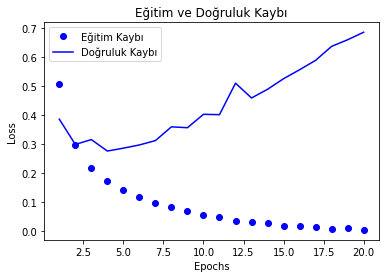

In [17]:
import matplotlib.pyplot as plt

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epoch = range(1,len(loss_values) +1)

plt.plot(epoch,loss_values,'bo',label = 'Eğitim Kaybı')
plt.plot(epoch,val_loss_values,'b',label = 'Doğruluk Kaybı')
plt.title('Eğitim ve Doğruluk Kaybı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.show()

# Eğitim ve Doğrulama Başarımını Çizdirmek

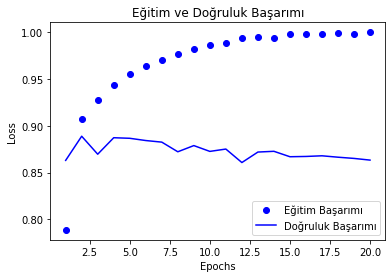

In [18]:
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epoch, acc,'bo',label = 'Eğitim Başarımı')
plt.plot(epoch,val_acc,'b',label = 'Doğruluk Başarımı')
plt.title('Eğitim ve Doğruluk Başarımı')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc=0)
plt.show()

# Modeli En Baştan Eğitmek

In [19]:
model = models.Sequential()
model.add(layers.Dense(16,activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size=512)
results = model.evaluate(x_test,y_test)


Epoch 1/4
49/49 [==============================] - 1s 13ms/step - loss: 0.4471 - accuracy: 0.8201
Epoch 2/4
49/49 [==============================] - 1s 13ms/step - loss: 0.2580 - accuracy: 0.9104
Epoch 3/4
49/49 [==============================] - 1s 13ms/step - loss: 0.1969 - accuracy: 0.9308
Epoch 4/4
782/782 [==============================] - 3s 3ms/step - loss: 0.2944 - accuracy: 0.8841


In [20]:
#Sonuçların Görüntülenmesi

print("Kayıp Fonksiyonu",results[0],"Doğruluk",results[1])

Kayıp Fonksiyonu 0.2944354712963104 Doğruluk 0.8840799927711487
